# EDA & t-test

#### nyc_citibike.csv 를 이용해 'Pershing Square North' 와 'Broadway & E 22 St ' 의 주행시간(trip_duration)  의 평균이 같은지 알아보는 t-test 를 진행해보세요. 
#### 조건)

>* 주행시간의 단위는 분(min) 으로 계산한다. 
>* 'Pershing Square North' 와 'Broadway & E 22 St ' 은 반납지점을 의미한다.
>* 각 지점에서 반납한 자전거의 주행시간은 독립이라고 가정한다.
>* t-test 를 진행하기 전 관련 변수에 관해 EDA 를 진행한다. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

### EDA
조건에 맞게 데이터를 가공하고 'Pershing Square North' 와 'Broadway & E 22 St ' 에 반납한 자전거의 주행시간을 적절한 그래프로 나타내세요.

In [455]:
df=pd.read_csv('nyc_citibike.csv')
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [456]:
#결측값 확인
df.isnull().sum()

start_date                 0
end_date                   0
start_hour                 0
end_hour                   0
trip_duration              0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
usertype                   0
birth_year                 0
gender                     0
day_since_register         0
dtype: int64

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
start_date                 72035 non-null object
end_date                   72035 non-null object
start_hour                 72035 non-null int64
end_hour                   72035 non-null int64
trip_duration              72035 non-null int64
start_station_id           72035 non-null int64
start_station_name         72035 non-null object
start_station_latitude     72035 non-null float64
start_station_longitude    72035 non-null float64
end_station_id             72035 non-null int64
end_station_name           72035 non-null object
end_station_latitude       72035 non-null float64
end_station_longitude      72035 non-null float64
bike_id                    72035 non-null int64
usertype                   72035 non-null object
birth_year                 72035 non-null int64
gender                     72035 non-null object
day_since_register         72035 non-null int64
dtypes: float

> 조건: 
    1) 주행시간의 단위는 분(min) 으로 계산한다.
>   
    2) 'Pershing Square North' 와 'Broadway & E 22 St ' 은 반납지점을 의미한다.

In [458]:
df['trip_duration']=df['trip_duration'].apply(lambda row: round(row/60, 2))

In [497]:
df_end=df[['bike_id','birth_year','gender','trip_duration','start_station_name','end_station_id','end_station_name','start_station_latitude',
           'start_station_longitude','end_station_latitude', 'end_station_longitude']]
df_end=df_end.loc[(df_end['end_station_name']=='Pershing Square North')|(df_end['end_station_name']=='Broadway & E 22 St')]



In [498]:
df_end.head()

,bike_id,birth_year,gender,trip_duration,start_station_name,end_station_id,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
372,18539,1955,male,19.25,Broadway & W 60 St,402,Broadway & E 22 St,40.769155,-73.981918,40.740343,-73.989551
497,31214,1959,male,14.88,11 Ave & W 41 St,519,Pershing Square North,40.760301,-73.998842,40.751873,-73.977706
567,25999,1993,male,9.85,Allen St & Stanton St,402,Broadway & E 22 St,40.722055,-73.989111,40.740343,-73.989551
631,25781,1974,male,11.37,11 Ave & W 41 St,519,Pershing Square North,40.760301,-73.998842,40.751873,-73.977706
719,31653,1986,male,8.33,Mercer St & Bleecker St,402,Broadway & E 22 St,40.727064,-73.996621,40.740343,-73.989551


In [499]:
# start~end 까지의 거리를 계산하기 위해 함수 정의
import math

def distance(start_lat, start_long, end_lat, end_long):
    radius = 6373 # radius of earth

    dlat = math.radians(end_lat-start_lat)
    dlon = math.radians(end_long-start_long)
    a = math.sin(dlat/2) **2 + math.cos(math.radians(start_lat)) \
        * math.cos(math.radians(end_lat)) * math.sin(dlon/2) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [500]:
df_end['distance']=df_end.apply(lambda row: distance(row['start_station_latitude']
                                  , row['start_station_longitude'],row['end_station_latitude']
                                  ,row['end_station_longitude']) , axis=1)

In [501]:
#distance 계산 후, 필요없어진 칼럼 삭제하기
df_end=df_end.drop(['start_station_latitude', 'start_station_longitude'
             ,'end_station_latitude','end_station_longitude'], axis=1)

In [502]:
# start~ end까지의 거리를 계산하고, 주행거리와 비교
# 그런데, 같은 지점에서 시작했는데, 거리가 다른 애들이 있기 때문에 평균을 구한다 
# 주행거리 분명히 소수점 2째 자리 반올림했는데 왜 다시 이렇게 되었는지 모를일...;;
data=df_end.groupby(['end_station_name','start_station_name']).mean()[['distance','trip_duration']].reset_index()
data.head()

,end_station_name,start_station_name,distance,trip_duration
0,Broadway & E 22 St,1 Ave & E 16 St,1.122274,7.933333
1,Broadway & E 22 St,1 Ave & E 18 St,1.050693,8.365000
2,Broadway & E 22 St,1 Ave & E 30 St,1.202141,10.456667
3,Broadway & E 22 St,1 Ave & E 68 St,3.809196,26.280000
4,Broadway & E 22 St,1 Ave & E 78 St,4.599410,26.380000


## 단변수 분석 및 시각화
- continuous, binary, categorical 변수 파악 후 시각화

In [503]:
# 변수별 데이터타입 확인
for col in df_end.columns:
    print(col,'unique values?', df_end[col].nunique())

bike_id unique values? 1062
birth_year unique values? 59
gender unique values? 3
trip_duration unique values? 765
start_station_name unique values? 298
end_station_id unique values? 2
end_station_name unique values? 2
distance unique values? 423


## 변수별 데이터 타입
- bike_id: categorical
- birth_year: categorical
- gender: binary
- trip_duration: continuous
- start_station_name: categorical 
- end_station_id: binary
- end_station_name: binary
- distance: continuous

## 1) binary
- gender, end_station_name

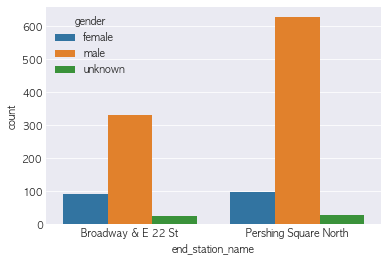

In [508]:
# binary 데이터 분포가 어떻게 되어있는지 보자
sns.barplot(x='end_station_name', y='bike_id', hue='gender', data=bin.reset_index())
plt.ylabel('count')
plt.show()

> 두 집단의 크기는 다르다
- pershing의 데이터 크기 = broadway의 데이터 크기의 두배
- -> 스케일을 맞춰주고 다시 플랏해보자

In [587]:
#scale 맞춰주자
bin=df_end.groupby(['end_station_id','gender']).count().reset_index()
bin

,end_station_id,gender,bike_id,birth_year,trip_duration,start_station_name,end_station_name,distance
0,402,female,92,92,92,92,92,92
1,402,male,330,330,330,330,330,330
2,402,unknown,26,26,26,26,26,26
3,519,female,97,97,97,97,97,97
4,519,male,626,626,626,626,626,626
5,519,unknown,27,27,27,27,27,27


In [590]:
#scale!! 
sum402=bin['bike_id'].loc[bin['end_station_id']==402].sum()
sum519=bin['bike_id'].loc[bin['end_station_id']==519].sum()

bin.loc[bin['end_station_id']==402,'bike_id']/=sum402
bin.loc[bin['end_station_id']==519,'bike_id']/=sum519

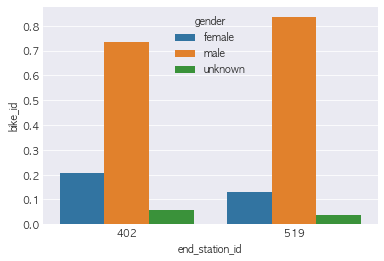

In [599]:
sns.barplot(x='end_station_id',y='bike_id',hue='gender',data=bin)

> 스케일을 맞춰서 플랏해보니,
- 집단의 크기는 402(broadway)가 519(pershing)의 1/2정도이며,
- 성별 분포는, 남성: 여성의 분포는 비슷하게 남성이 약 3배 많은 것을 알 수 있다

## 2) continuous
- trip_duration, distance

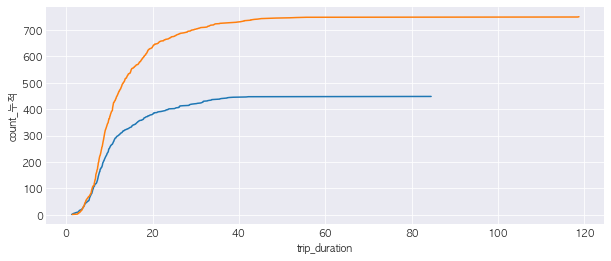

In [512]:
#continuous 인 애들과 내가 궁금한 end_station 간의 관계를 비교해보자
#분포를 보기 편하게 누적분포를 보자
data1=df_end.loc[df_end['end_station_id']==402].groupby('trip_duration').count().cumsum().reset_index()
data2=df_end.loc[df_end['end_station_id']==519].groupby('trip_duration').count().cumsum().reset_index()

f, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x='trip_duration',y='end_station_name',data=data1)
sns.lineplot(x='trip_duration',y='end_station_name',data=data2)
plt.ylabel('count_누적')
plt.show()


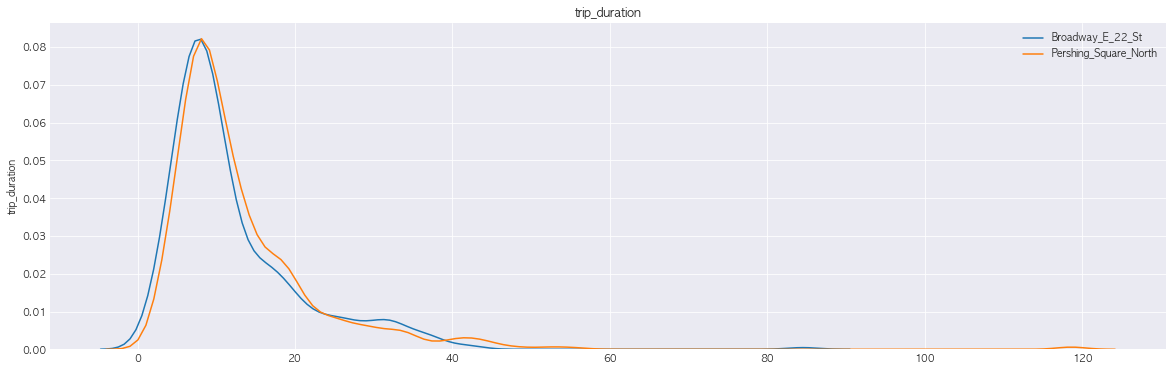

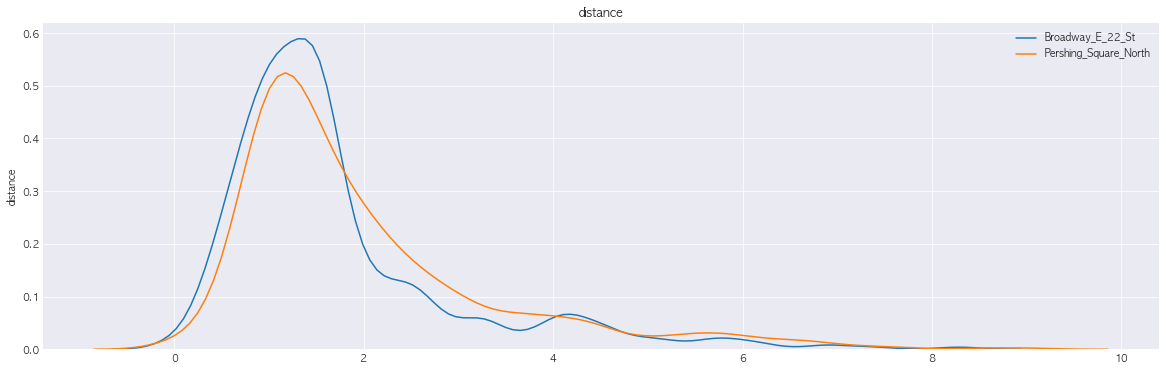

In [511]:
cont=['trip_duration','distance']
for i in range(2):
    c=cont[i]
    f, ax=plt.subplots(figsize=(20,6))
    
    sns.kdeplot(data=df_end.loc[df_end['end_station_name']=='Broadway & E 22 St'][c], ax=ax, label='Broadway_E_22_St')
    sns.kdeplot(data=df_end.loc[df_end['end_station_name']=='Pershing Square North'][c], ax=ax, label='Pershing_Square_North')
    plt.ylabel(c)
    plt.title(c)
    plt.show()


> trip_duration, distance에 대하여, 두 집단의 분포 자체는 거의 비슷

## 3) categorical 
- birth_year, bike_id, start_station_name
- bike_id는 유의미하지 않을 것으로 판단하여 생략한다

### (1) birth_year
- 나이가 많을 수록 주행시간, 거리가 짧을 것이다

In [521]:
birth=df_end.groupby('birth_year').mean()[['trip_duration','distance']].reset_index()
birth.head()

,birth_year,trip_duration,distance
0,1916,42.22,6.014165
1,1942,8.47,0.884155
2,1943,11.82,0.000000
3,1944,18.68,1.710028
4,1945,8.13,1.199658


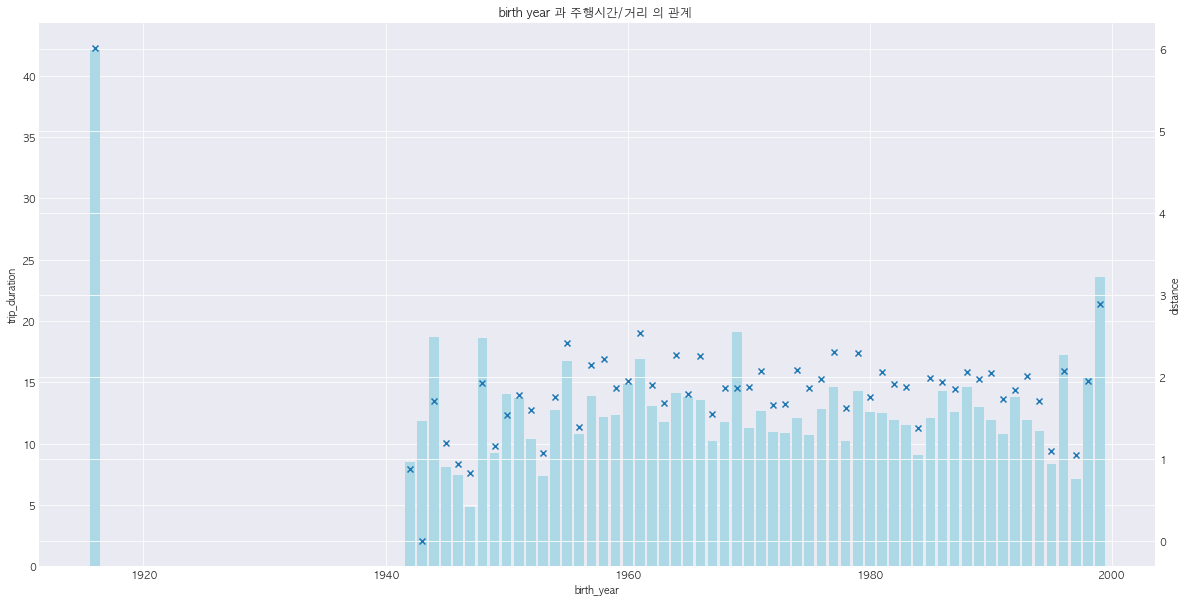

In [533]:
f, ax = plt.subplots(1,1,figsize=(20,10))

ax2 = ax.twinx()
ax.bar(birth['birth_year'], birth["trip_duration"], color='lightblue')
ax2.scatter(birth['birth_year'], birth["distance"], marker='x')
ax.set_ylabel('trip_duration')
ax2.set_ylabel('distance')
ax.set_xlabel('birth_year')
plt.title('birth year 과 주행시간/거리 의 관계')
plt.show()

> 예상과 달리, birth year과 주행거리/시간은 유의미한 관계가 없다.
- 그리고, 1916년도에 미친듯한 주행거리와 시간을 보이는 왼쪽의 아이는 아마도 birth year가 잘못되었거나, 
할아버지 계정을 사용한게 아닐까..

### (2) start_station_name

In [471]:
data3=df_end.groupby(['end_station_id','start_station_name']).count()['bike_id'].reset_index()
data3.rename(columns={'bike_id':'count'}, inplace=True)
data3.head()

,end_station_id,start_station_name,count
0,402,1 Ave & E 16 St,3
1,402,1 Ave & E 18 St,4
2,402,1 Ave & E 30 St,3
3,402,1 Ave & E 68 St,1
4,402,1 Ave & E 78 St,1


In [472]:
# 시작 지점 탑텐 뽑기 (도착지 별로)
#data1: id가 402
#data2: id가 519
data1=data3.loc[data3['end_station_id']==402].sort_values(by='count', ascending=False).iloc[:10,:]
#count->percent
data1['count']= data1['count'].apply(lambda row: (row/data1['count'].sum()*100))
data1['count']= data1['count'].apply(lambda row: round(row,2))
data1.rename(columns={'count':'count_percentage'}, inplace=True)

data2=data3.loc[data3['end_station_id']==519].sort_values(by='count', ascending=False).iloc[:10,:]
data2['count']= data2['count'].apply(lambda row: (row/data2['count'].sum()*100))
data2['count']= data2['count'].apply(lambda row: round(row,2))
data2.rename(columns={'count':'count_percentage'}, inplace=True)

data1.head()

,end_station_id,start_station_name,count_percentage
127,402,Pershing Square North,14.44
155,402,W 22 St & 10 Ave,12.22
112,402,Lafayette St & E 8 St,11.11
162,402,W 31 St & 7 Ave,10.00
150,402,W 16 St & 8 Ave,10.00


In [473]:
# 두 개를 concat
toptens=pd.concat([data1,data2],axis=0)

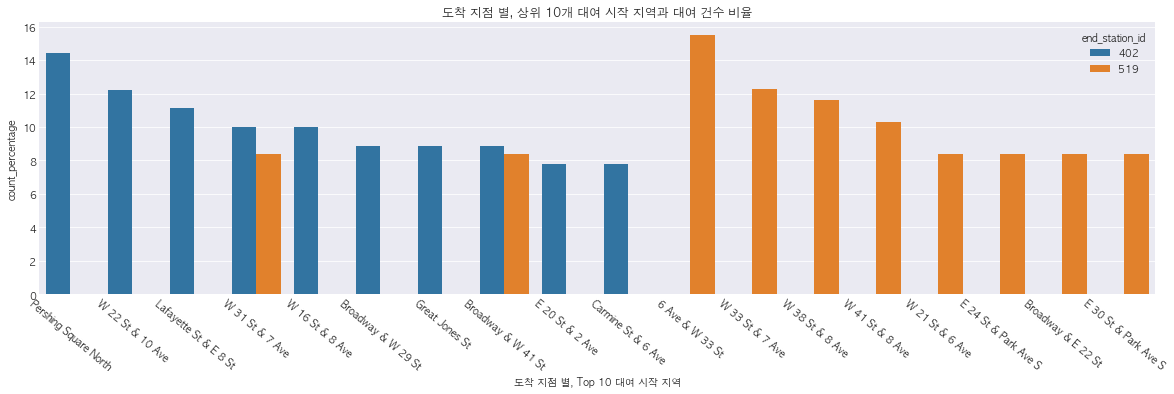

In [474]:
#bike_ id는 필요없을 것 같고, 시작 지점만 살펴보자

f,ax= plt.subplots(figsize=(20,5))
sns.barplot(x='start_station_name', y='count_percentage',hue='end_station_id', data=toptens)
plt.xlabel('도착 지점 별, Top 10 대여 시작 지역')
plt.xticks(rotation=320)
plt.ylabel('count_percentage')
plt.title('도착 지점 별, 상위 10개 대여 시작 지역과 대여 건수 비율')
plt.show()

> 도착 지점 별, 상위 10개 대여 시작 지역을 살펴보았다.
- 겹치는 지역이 별로 없다. 거리차이 때문일 거라고 생각-> 거리를 보자!!

In [475]:
dist=df_end.groupby(['end_station_id','start_station_name']).mean()['distance'].reset_index()
dist.head()

,end_station_id,start_station_name,distance
0,402,1 Ave & E 16 St,1.122274
1,402,1 Ave & E 18 St,1.050693
2,402,1 Ave & E 30 St,1.202141
3,402,1 Ave & E 68 St,3.809196
4,402,1 Ave & E 78 St,4.599410


In [476]:
toptens_dist=pd.merge(toptens, dist, on=['end_station_id','start_station_name'], how='left')
#toptens_dist=toptens_dist.sort_values(by='distance')

In [477]:
mean_402=toptens_dist.loc[toptens_dist['end_station_id']==402].apply(lambda row: 
                                                            row['count_percentage'] * row['distance']
                                                            ,axis=1).sum()/100
mean_519=toptens_dist.loc[toptens_dist['end_station_id']==519].apply(lambda row: 
                                                            row['count_percentage'] * row['distance']
                                                            ,axis=1).sum()/100
print('시작 지점 부터 Broadway & E 22 St 까지의 거리:',mean_402)
print('시작 지점 부터 Pershing Square North 까지의 거리:',mean_519)

시작 지점 부터 Broadway & E 22 St 까지의 거리: 1.2582427937567455
시작 지점 부터 Pershing Square North 까지의 거리: 1.1989806215197008


> 도착 지점 별, topten 시작 지점에서의 거리는 1.26km vs 1.20km 로 비슷하다
- 1.20~ 1.26 km 정도가 자전거타기 만만한 거리라는 것을 알 수 있다

## continuous 변수 간의 상관관계

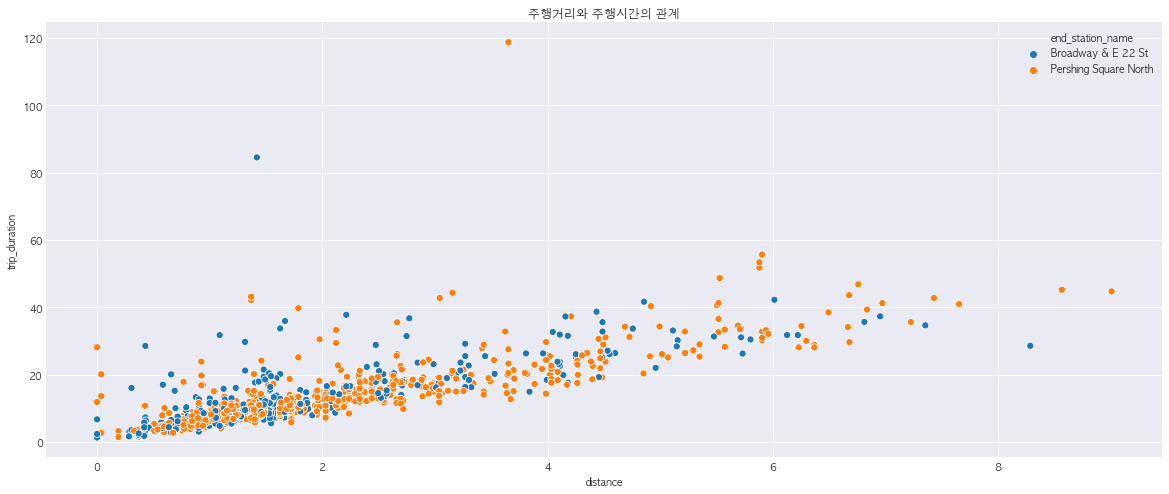

In [649]:
f, ax= plt.subplots(figsize=(20,8))
sns.scatterplot(x='distance', y='trip_duration', data=df_end, hue='end_station_name', s=50)
plt.title('주행거리와 주행시간의 관계')
plt.show()
#너무 당연한 플랏...
#distance가 0 일때 trip_duration이 10,20 인 애들은 거르자
#trip_duration>80 인 두 점도 거르자

## outlier 검사

In [446]:
#주행거리가 엄청 적은데 주행시간이 큰 애들은 거르자
df_end.sort_values(by='distance').head(10)

,bike_id,trip_duration,start_station_name,end_station_id,end_station_name,distance
37875,25527,28.10,Pershing Square North,519,Pershing Square North,0.000000
39721,29116,1.28,Broadway & E 22 St,402,Broadway & E 22 St,0.000000
49733,15149,6.67,Broadway & E 22 St,402,Broadway & E 22 St,0.000000
47145,15255,2.32,Broadway & E 22 St,402,Broadway & E 22 St,0.000000
28251,29716,11.82,Pershing Square North,519,Pershing Square North,0.000000
70012,31653,20.08,Pershing Square South,519,Pershing Square North,0.036747
38798,30972,2.70,Pershing Square South,519,Pershing Square North,0.036747
31915,31486,13.60,Pershing Square South,519,Pershing Square North,0.036747
52893,31337,1.43,E 41 St & Madison Ave,519,Pershing Square North,0.189527
22371,27465,3.17,E 41 St & Madison Ave,519,Pershing Square North,0.189527


In [482]:
#주행 시간이 80 이상인 애는 제외
df_end.sort_values(by=['trip_duration'], ascending=False).head()

,bike_id,trip_duration,start_station_name,end_station_id,end_station_name,distance
65977,19476,118.77,Greenwich St & W Houston St,519,Pershing Square North,3.651727
64807,21215,118.47,Greenwich St & W Houston St,519,Pershing Square North,3.651727
34364,28818,84.53,E 13 St & Avenue A,402,Broadway & E 22 St,1.418787
8473,15240,55.67,South St & Gouverneur Ln,519,Pershing Square North,5.904200
62407,29323,53.35,Pearl St & Hanover Square,519,Pershing Square North,5.880910


In [495]:
#아웃라이어 제거
outlier=df_end.loc[(df_end['distance']<0.04)&(df_end['trip_duration']>10)].index
df_end=df_end.drop(outlier,axis=0)
outlier=df_end.loc[df_end['trip_duration']>80].index
df_end=df_end.drop(outlier,axis=0)

### T-test
귀무가설은 무엇일까요?

H0: Pershing Square North 와 Broadway & E 22 St 의 주행시간(trip_duration) 의 평균에는 차이가 없다

어떤 T-test 를 적용해야할까요?    
- 독립표본: 

    두 집단의 모평균(모집단의 평균)은 동일하다는 가설

    따라서 두 집단의 표본평균의 차이가 0은 아닐 수 있지만, 그렇게 큰 차이를 보이지는 않을 것임

    두 표본평균이 심각하게 차이가 난다면, 두 집단의 모평균이 동일하다는 가설이 맞지 않을 가능성이 높음

    두 표본평균이 차이나는 정도에 대한 가능성(확률)을 계산하고 이를 바탕으로 "두 집단의 모평균(모집단의 평균)은 동일하다는 가설"에 대해서 판단함

분석해봅시다!

In [615]:
#변수 생성
pershing=df_end[df_end['end_station_name']=='Pershing Square North']['trip_duration'].array
broadway=df_end[df_end['end_station_name']=='Broadway & E 22 St']['trip_duration'].array


In [616]:
from scipy import stats

### 정규성 검정
: 데이터가 커서 진행하지 않아도 되지만..

In [617]:
normal1 = stats.shapiro(pershing)
normal2 = stats.shapiro(broadway)
print(normal1, normal2)

(0.6988873481750488, 1.6031095787039248e-34) (0.7965385913848877, 2.756225729211936e-23)


> p-value가 모두 0.05보다 커서 정규성을 만족한다

### 등분산 검정
: 두 정규분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규분포의 분산 모수가 같은지 확인하기 위한 검정

앞에서 분포확인 했지만.. 실행

In [618]:
lresult = stats.levene(pershing, broadway)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

LeveneResult(F) : 0.375 
p-value : 0.540


> Levene의 등분산 검정 결과,
>
> 1) F값이 0.375이다
- F값: 집단간 분산/집단내 분산 -> F값이 크면클수록 두 표본의 분산이 동일하지 않다
>
> 2) p-value가 0.540으로, 0.05보다 크다
>
> 결론적으로, 등분산성을 만족한다

In [619]:
#등분산인 독립표본 t-검정 실행 
result = stats.ttest_ind(pershing, broadway, equal_var=True) 
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 1.792 
p-value : 0.073


In [622]:
# 두 집단의 평균
np.mean(pershing), np.mean(broadway)

(13.254093333333335, 12.211272321428583)

> 결론:
>
> 독립표본 t-검정 결과,
> t값이 1.792, p-value가 0.073으로 신뢰수준 99%하에서 귀무가설을 기각할 수 없다. 
>
> 따라서 도착지점에 따른 평균 주행시간의 평균의 차이는, 통계적으로 유의미하지 않다.

https://no17.tistory.com/189

https://datascienceschool.net/view-notebook/14bde0cc05514b2cae2088805ef9ed52/

http://blog.naver.com/parksehoon1971/221585513533

분석 결과를 해석해주세요

가능성:

1) 두 지점이 가까워서, 시작점에 상관없이 평균 주행시간의 평균의 차이가 없었다. X

2) 보통 자전거를 이용하는 사람들이 평균적으로 주행하는 시간이 정해져있다. V

In [647]:
broadway_loc=df[df['end_station_id']==402][['end_station_latitude',
                'end_station_longitude']].mean().to_list()
pershing_loc=df[df['end_station_id']==519][['end_station_latitude',
                 'end_station_longitude']].mean().to_list()

In [648]:
# 두 지점이 얼마나 떨어져 있는지 보자 -> 멀다..
distance(broadway_loc[0],broadway_loc[1],pershing_loc[0],pershing_loc[1])

1.6251286792710222


### 1. 
3)-(2)에서 살펴봤듯, 가장 빈도수가 높게 나온 시작 지점과 종점간의 거리를 비교했을때, topten 시작지점에서는 1.20~ 1.26 km 를 (평균적인) 선호되는 자전거 주행거리 범위로 판단할 수 있었다.

### 2.
 연속형 변수간의 관계 plot에서 살펴봤듯,주행거리는 주행시간에 대하여 양의 상관관계를 지닌다 
### 3. 

주행거리가 평균적으로 정해져 있으므로, 주행시간 또한 평균적으로 결정되어있을 것이다.


### 4.

- 다음은 종점별, 시작지점에서부터의 평균 주행거리이다. (이번에는 탑텐이 아니라 전체 평균)
- Broadway & E 22 St	: 1.73km 
- Pershing Square North	: 2km 

In [718]:
agg={'bike_id':'count','distance':'mean'}
dff=df_end.groupby(['end_station_name','start_station_name']).agg(agg).reset_index()
dff['dist_average']=dff['bike_id']*dff['distance']
dff=dff.groupby(['end_station_name']).sum().reset_index()
dff['dist_average']/=dff['bike_id']
dff

,end_station_name,bike_id,distance,dist_average
0,Broadway & E 22 St,448,435.708229,1.731369
1,Pershing Square North,750,665.380396,1.999891


### 5. 
- (1) 다음은 평균 주행거리 범위 (1.73~2km) 에 대한 주행시간의 평균이다 
- (2) 다음은 평균 주행거리에 대한 주행시간을 회귀직선으로 나타낸 것이다

In [722]:
#(1)
df_end[(df_end['distance']>1.73)&(df_end['distance']<2)]['trip_duration'].mean()

12.138000000000005

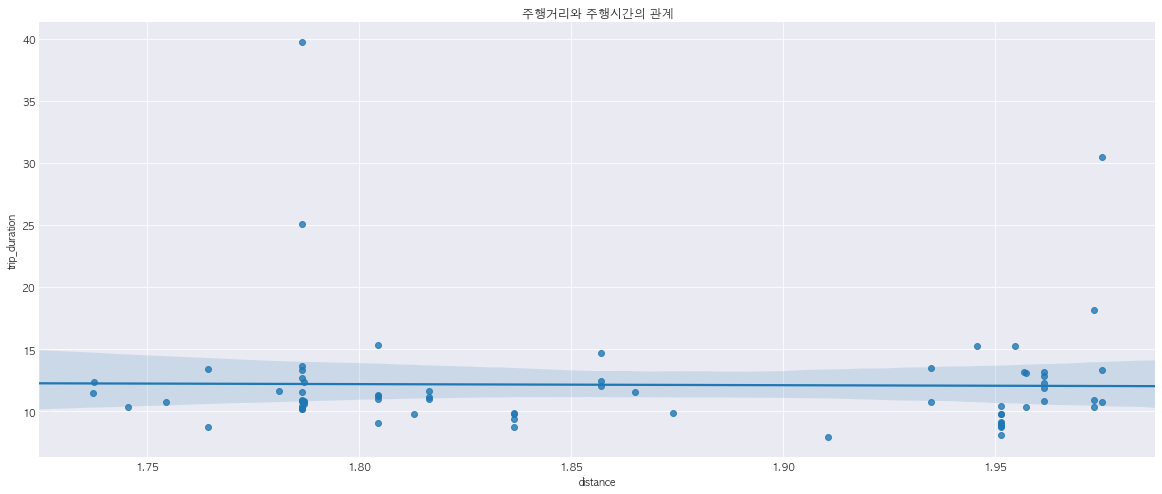

In [726]:
#(2)
f, ax= plt.subplots(figsize=(20,8))
sns.regplot(x='distance', y='trip_duration',
                data=df_end[(df_end['distance']>1.73)&(df_end['distance']<2)])
plt.title('주행거리와 주행시간의 관계')
plt.show()

### 6.

- 평균 주행거리에 따른 주행시간(12.13)이 앞에서 제시된 두 집단의 평균(13.2, 12.2)와 큰 차이가 없다
- 종점에 대하여 평균 주행거리,시간은 독립적이다
- 평균 주행거리, 시간은 곧 이용자들이 선호하는 주행거리, 시간으로 해석할 수 있다